# Use Case 1: Comparing Omics Data

## Step 1: Importing packages and setting up your notebook.

This use case will guide you through basic features of our package, including importing the package and loading the data, interacting with the dataframes, and producing a basic scatterplot comparing proteomics and transcriptomics for a given gene. We will begin by importing standard data analysis libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Next, we will import the cptac package, and load the Endometrial dataset object. This dataset object includes functions that allow the user to access and perform basic operations on the data from the endometrial cancer patients.

In [2]:
import cptac
import cptac.utils as ut

en = cptac.Ucec()

## Step 2: Joining dataframes

Now that we've imported the package and loaded the data, we can begin to extract the data we need. In this use case, we want to compare the proteomics and transcriptomics data from the endometrial cancer patients for the A1BG gene. For a full list of available data, enter `en.list_data_sources()`. For a full list of functions available for accessing and manipulating the data, enter `help(en)`. To access documentation for a specific function, pass it to the help() function, e.g. `help(en.multi_join)`.

We use the `en.multi_join()` function to join the A1BG columns from the proteomics and transcriptomics dataframes into a single dataframe.

In [3]:
A1BG_cross = en.multi_join({"umich proteomics": "A1BG", "bcm transcriptomics": "A1BG"})

# Use cptac.utils.reduce_multiindex to get rid of a level we don't need from the column index
A1BG_cross = ut.reduce_multiindex(A1BG_cross, levels_to_drop="Database_ID")

print(A1BG_cross.head())

Name        A1BG_umich_proteomics  A1BG_bcm_transcriptomics
Patient_ID                                                 
C3L-00006               -1.121101                      2.54
C3L-00008               -0.798504                      4.40
C3L-00032               -0.577203                      4.83
C3L-00084                1.612713                      4.73
C3L-00090               -1.350755                      4.14


## Step 3: Plot data

Finally, we will plot the transcriptomics data against the proteomics data. We use the Seaborn library for our tutorials, but you can get similar results using matplotlib.pyplot. The first plot we will make (for the A1BG gene) has a positive correlation between the proteomics and transcriptomics data.

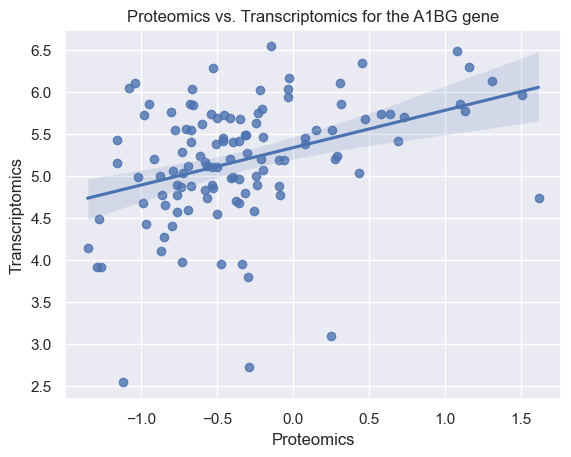

In [4]:
sns.set(style="darkgrid")
plot = sns.regplot(x=A1BG_cross.columns[0], y=A1BG_cross.columns[1], 
                   data=A1BG_cross)
plot.set(xlabel='Proteomics', ylabel='Transcriptomics', 
         title='Proteomics vs. Transcriptomics for the A1BG gene')
plt.show()

## Step 4: Plot more data

This exploratory task of examining the correlation between mRNA and protein abundance can be easily done for many genes. Here's another example with a ribosomal protein 'RPL11'.

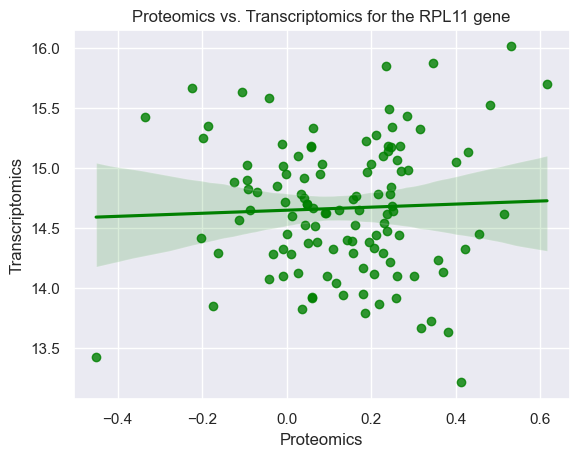

In [5]:
gene = 'RPL11'
gene_cross = en.multi_join({"umich proteomics": gene, "bcm transcriptomics": gene});
# Use cptac.utils.reduce_multiindex to get rid of a level we don't need from the column index
gene_cross = ut.reduce_multiindex(gene_cross, levels_to_drop="Database_ID")
plot = sns.regplot(x=gene_cross.columns[0], y=gene_cross.columns[1], data=gene_cross, color="green")
plot.set(xlabel='Proteomics', ylabel='Transcriptomics',
         title='Proteomics vs. Transcriptomics for the ' + gene + ' gene')
plt.show()

## Step 5: Repeat with the Ovarian Dataset

The cptac package uses the same API to present data from many different cancer types. Here we repeat the above exploratory analysis on ovarian cancer for the protein PTEN.

cptac warning: The following columns were not found in the bcm transcriptomics dataframe, so they were inserted into joined table, but filled with NaN: PTEN (C:\Users\sabme\anaconda3\lib\site-packages\cptac\cancers\cancer.py, line 578)


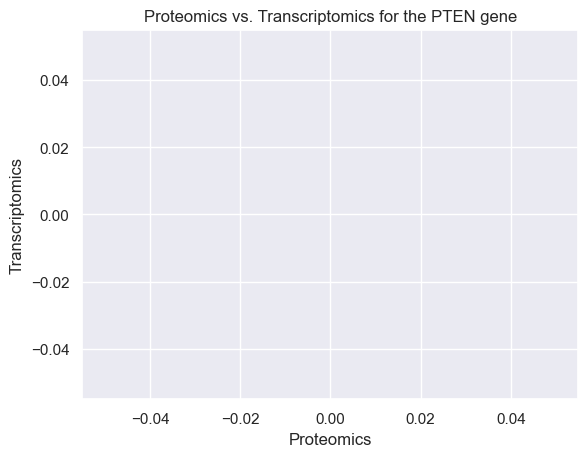

In [9]:
ov = cptac.Ov()
ovarian_cross = ov.multi_join({"umich proteomics": "PTEN", "bcm transcriptomics": "PTEN"})

# Use cptac.utils.reduce_multiindex to get rid of a level we don't need from the column index
ovarian_cross = ut.reduce_multiindex(ovarian_cross, levels_to_drop="Database_ID")

sns.set(style="darkgrid")
plot = sns.regplot(x=ovarian_cross.columns[0], y=ovarian_cross.columns[1], data=ovarian_cross)
plot.set(xlabel='Proteomics', ylabel='Transcriptomics', title='Proteomics vs. Transcriptomics for the PTEN gene')
plt.show()


## Step 6: Repeat with the Colon dataset

We will also demonstrate how to go through this same process for the Colon dataset.

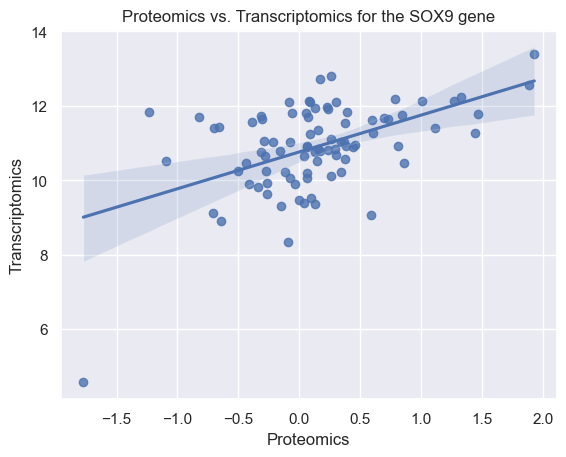

In [7]:
co = cptac.Coad()
source1 = 'umich'
source2 = 'bcm'
colon_cross = co.join_omics_to_omics(df1_name="proteomics", df2_name="transcriptomics",
                                     df1_source=source1, df2_source=source2,
                                     genes1="SOX9", genes2="SOX9")

sns.set(style="darkgrid")
plot = sns.regplot(x=colon_cross.columns[0], y=colon_cross.columns[1], data=colon_cross)
plot.set(xlabel='Proteomics', ylabel='Transcriptomics', title='Proteomics vs. Transcriptomics for the SOX9 gene')
plt.show()